In [86]:
import imgaug.augmenters as iaa
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [87]:
dataset=[]
filepath='D:/GP/Data/Chest CT-Scan images Dataset/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'

In [88]:
seq = iaa.Sequential([
    iaa.Fliplr(0.3),  # horizontally flip 50% of the images
    iaa.Affine(rotate=(-20, 20)),  # rotate images by -20 to +20 degrees
    iaa.GaussianBlur(sigma=(0, 1.0)),  # apply Gaussian blur with a sigma between 0 and 1.0
    iaa.AdditiveGaussianNoise(scale=(0, 0.1*255)),  # add Gaussian noise
    iaa.Crop(percent=(0, 0.1)),  # crop images by 0-10% of their height/width
    iaa.LinearContrast((0.75, 1.5)),  # apply random contrast changes
], random_order=True)  # apply the augmentations in random order

In [89]:
for filename in os.listdir(filepath):
    # Check if the file is an image (you may need to add more image extensions)
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Read the image
        image_path = os.path.join(filepath, filename)
        image = cv2.imread(image_path)
        if image is not None:
            # Append the image to the dataset list
            dataset.append(image)
    else:
        print(f"Skipping file {filename}, not an image")

# Check the number of images imported
print(f"Imported {len(dataset)} images")

Imported 23 images


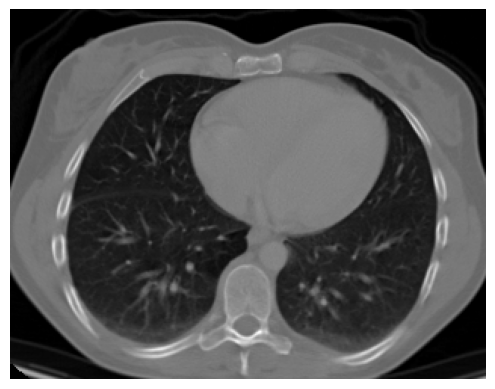

In [90]:
if dataset:
    # Display the first image in the dataset
    plt.imshow(dataset[0])
    plt.axis('off')  # Turn off axis numbers
    plt.show()
else:
    print("Dataset is empty, no images to display")

In [91]:
# Perform augmentation on each image in the dataset
augmented_images = []
for image in dataset:
    augmented_image = seq.augment_image(image)
    # for i in range(0):
    #     augmented_image=seq.augment_image(augmented_image)
    augmented_images.append(augmented_image)

In [92]:
len(augmented_images)

23

In [93]:
for i in range(len(augmented_images)):
    filename = f'lcc{i+196}.png'
    filepath = os.path.join('D:/GP/Data/Chest CT-Scan images Dataset/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', filename)
    cv2.imwrite(filepath, augmented_images[i])